In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
etf_df = pd.read_table("../merge_etf_rolling5.csv", sep="\t", index_col=0)

In [48]:
etf_df = etf_df.fillna(0.0)
etf_df[etf_df > 0.04] = 0.04
etf_df[etf_df < -0.04] = -0.04

In [38]:
import seaborn as sns
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

In [39]:
index_dict = {
    "sh510050": "上证50ETF",
    "sh563000": "中国A50ETF",
    "sh560050": "MSCI中国A50ETF",
    "sh510300": "沪深300ETF",
    "sh510330": "300ETF基金",
    "sh561300": "300增强ETF",
    "sh561990": "沪深300增强ETF",
    "sh510500": "中证500ETF",
    "sh561550": "500增强ETF",
    "sh512500": "500ETF基金",
    "sz159845": "中证1000ETF",
    "sh512100": "中证1000ETF",
    "sz159949": "创业板50ETF",
    "sz159915": "创业板ETF",
    "sz159967": "创成长ETF",
    "sh588000": "科创50ETF",
    "sh588080": "科创板50ETF",
    "sh588050": "科创ETF",
    "sh515790": "光伏ETF",
    "sh512480": "半导体ETF",
    "sh512760": "芯片ETF",
    "sz159995": "芯片ETF",
    "sh512660": "军工ETF",
    "sh516160": "新能源ETF",
    "sh515030": "新能源车ETF",
    "sh515700": "新能车ETF",
    "sz159611": "电力ETF",
    "sh516010": "游戏ETF",
    "sh515050": "5GETF",
    "sh512880": "证券ETF",
    "sh512000": "券商ETF",
    "sh512070": "证券保险ETF",
    "sh512800": "银行ETF",
    "sh512200": "房地产ETF",
    "sh510880": "红利ETF",
    "sz159905": "深红利ETF",
    "sh516970": "基建50ETF",
    "sh516950": "基建ETF",
    "sz159745": "建材ETF",
    "sz159825": "农业ETF",
    "sz159865": "养殖ETF",
    "sz159867": "畜牧ETF",
    "sz159605": "中概互联ETF",
    "sh513180": "恒生科技指数ETF",
    "sh513130": "恒生科技ETF",
    "sh513010": "恒生科技30ETF",
    "sz159920": "恒生ETF",
    "sh510900": "H股ETF",
    "sh513060": "恒生医疗ETF",
    "sh512010": "医药ETF",
    "sh512170": "医疗ETF",
    "sh512290": "生物医药ETF",
    "sh512690": "酒ETF",
    "sz159928": "消费ETF",
    "sz159996": "家电ETF",
    "sz159766": "旅游ETF",
    "sh515220": "煤炭ETF",
    "sh515210": "钢铁ETF",
    "sh516780": "稀土ETF",
    "sh512400": "有色金属ETF",
    "sh511380": "可转债ETF",
    "sh513500": "标普500ETF",
    "sh513100": "纳指ETF",
}

In [87]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [88]:
etf_df2 = etf_df.rename(columns=index_dict)

In [89]:
corr = etf_df2.corr()

In [90]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname='/liubinxu/liubinxu/finance/learning/SimHei.ttf',size=14)
sns.set(font=myfont.get_name())


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


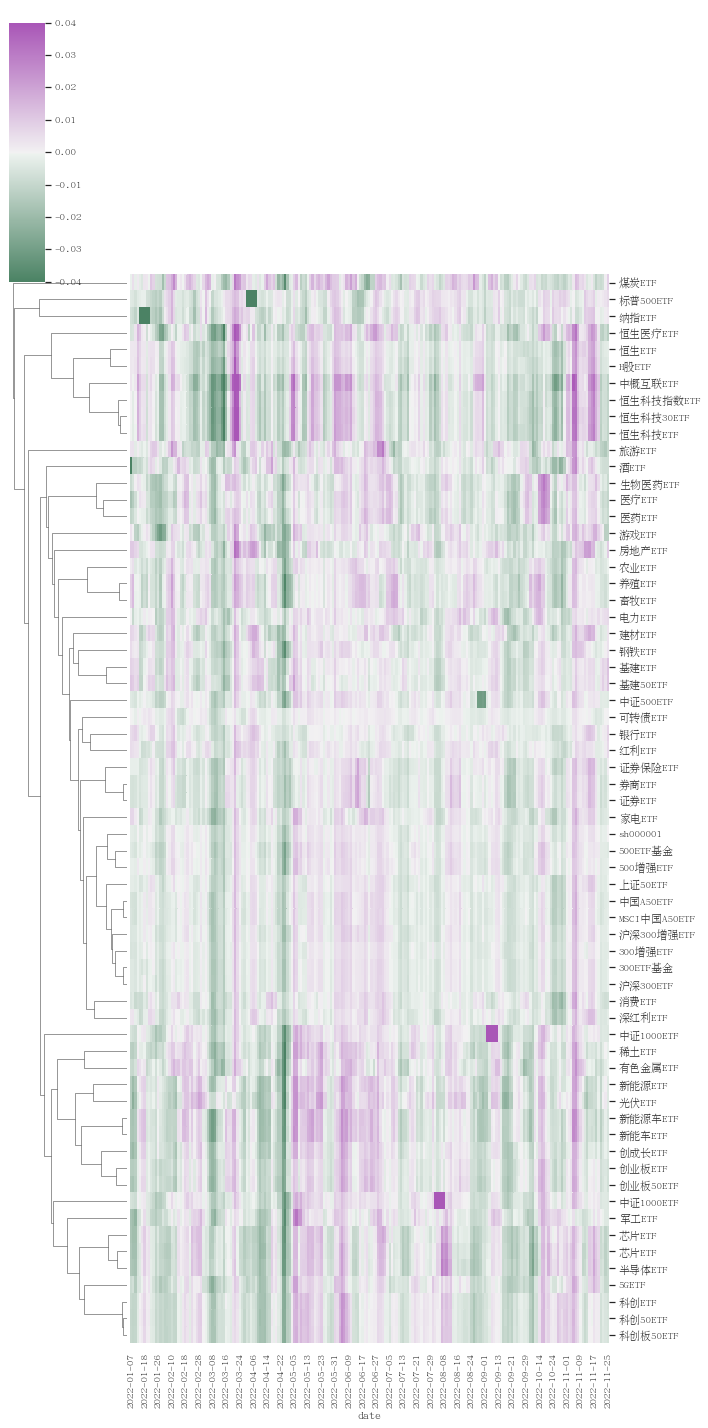

In [91]:
plt.rcParams["figure.figsize"] = (200,100)
# sns.set(font="simhei")
# sns.set_style({'font.sans-serif':['SimHei','Arial']})
# myfont=FontProperties(fname='/liubinxu/liubinxu/finance/learning/SimHei.ttf')
# sns.set(font=myfont.get_family())
# sns.set_style({"font.sans-serif":['SimHei']})

sns.set(font="AR PL UMing CN")
sns.clustermap(data=etf_df2.T, row_cluster=True, col_cluster=False, cmap=cmap, figsize=(10, 20))


plt.savefig("out1.png")

In [19]:
?sns.clustermap

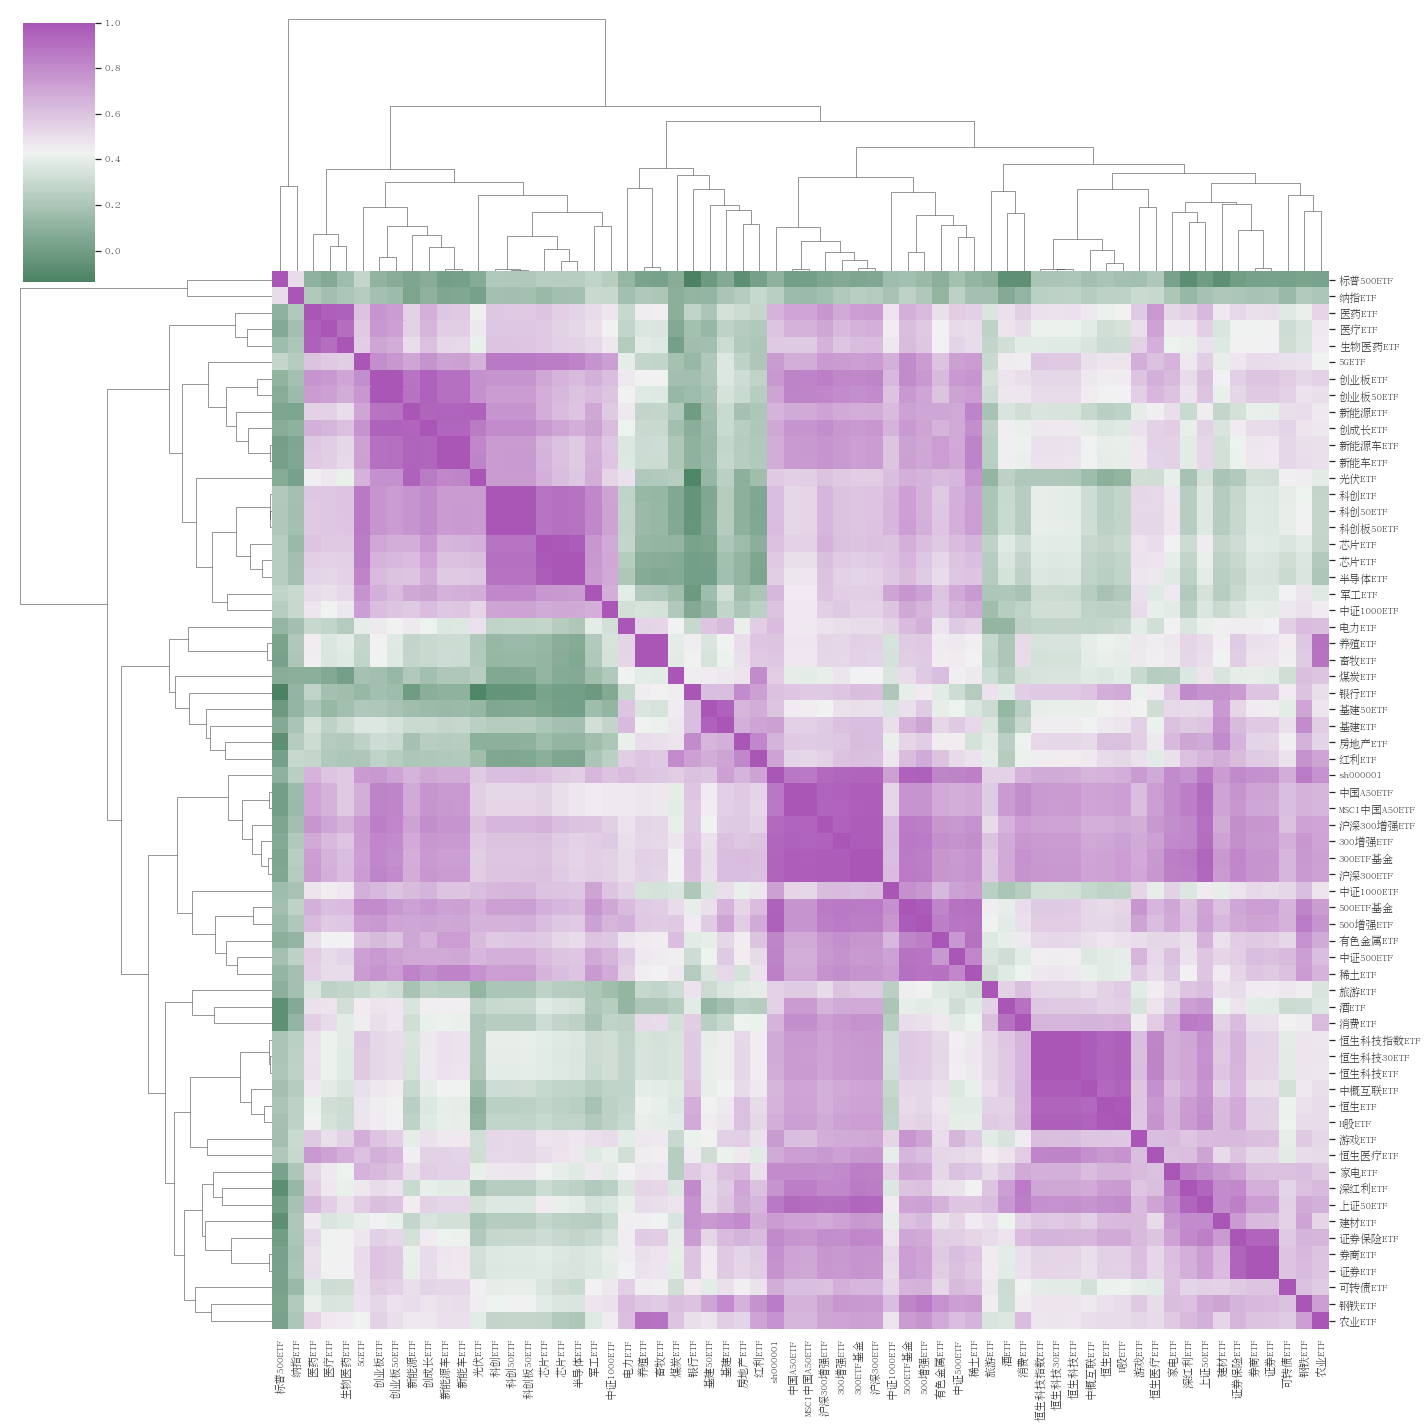

In [94]:
plt.rcParams["figure.figsize"] = (100,100)

sns.set(font="AR PL UMing CN")
a = sns.clustermap(data=corr, row_cluster=True, col_cluster=True, cmap=cmap, figsize=(20, 20))
plt.savefig("corr.png")

In [101]:
seqs = a.dendrogram_col.dendrogram["leaves"]

In [106]:
corr_sort = corr.iloc[seqs, seqs]

In [110]:
corr_sort.to_csv("corr.sort.tsv", sep = "\t")